# 1 - Предобработка данных 

In [1]:
# Установка библиотек
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для работы с пропусками и кодированием категориальных признаков
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Настройки визуализации
%matplotlib inline
sns.set(style='whitegrid')

# 1.1 - Изучение данных: загрузка и базовый обзор

В этой ячейке мы загрузим данные из файлов и посмотрим их размер, типы данных и наличие пропусков.

In [2]:
# Загрузка данных
df = pd.read_csv('dataset/salary_data_cleaned.csv')

# Удаление ненужных колонок (например, Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Приведение заголовков к snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Приведение всех строковых данных к нижнему регистру
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

# Проверка структуры данных
print(f'Размер датасета: {df.shape}')
print('\nИнформация о данных:\n')
print(df.info())

Размер датасета: (742, 28)

Информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          742 non-null    object 
 1   salary_estimate    742 non-null    object 
 2   job_description    742 non-null    object 
 3   rating             742 non-null    float64
 4   company_name       742 non-null    object 
 5   location           742 non-null    object 
 6   headquarters       742 non-null    object 
 7   size               742 non-null    object 
 8   founded            742 non-null    int64  
 9   type_of_ownership  742 non-null    object 
 10  industry           742 non-null    object 
 11  sector             742 non-null    object 
 12  revenue            742 non-null    object 
 13  competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 n

# Вывод:
# - Размер датасета определён.
# - Обнаружено отсутствие пропусков в числовых колонках.
# - Все заголовки приведены к snake_case.
# - Строковые данные переведены в нижний регистр.

# 1.2 - Анализ категориальных признаков

In [3]:
categorical_cols = ['job_title', 'type_of_ownership', 'industry', 'sector', 'revenue']

# job_title

In [4]:
print(f'Категории в столбце {categorical_cols[0]}:')
print(df[categorical_cols[0]].value_counts().head(10))
print('-'*40)

Категории в столбце job_title:
job_title
data scientist               131
data engineer                 53
senior data scientist         34
data analyst                  15
senior data engineer          14
senior data analyst           12
lead data scientist            8
marketing data analyst         6
sr. data engineer              6
machine learning engineer      5
Name: count, dtype: int64
----------------------------------------


# type_of_ownership

In [5]:
print(f'Категории в столбце {categorical_cols[1]}:')
print(df[categorical_cols[1]].value_counts().head(10))
print('-'*40)

Категории в столбце type_of_ownership:
type_of_ownership
company - private                 410
company - public                  193
nonprofit organization             55
subsidiary or business segment     34
government                         15
hospital                           15
college / university               13
other organization                  3
school / school district            2
unknown                             1
Name: count, dtype: int64
----------------------------------------


# industry

In [6]:
print(f'Категории в столбце {categorical_cols[2]}:')
print(df[categorical_cols[2]].value_counts().head(10))
print('-'*40)

Категории в столбце industry:
industry
biotech & pharmaceuticals                  112
insurance carriers                          63
computer hardware & software                59
it services                                 50
health care services & hospitals            49
enterprise software & network solutions     42
internet                                    29
consulting                                  29
aerospace & defense                         25
advertising & marketing                     25
Name: count, dtype: int64
----------------------------------------


# sector

In [7]:
print(f'Категории в столбце {categorical_cols[3]}:')
print(df[categorical_cols[3]].value_counts().head(10))
print('-'*40)

Категории в столбце sector:
sector
information technology       180
biotech & pharmaceuticals    112
business services             97
insurance                     69
health care                   49
finance                       42
manufacturing                 34
aerospace & defense           25
education                     23
retail                        15
Name: count, dtype: int64
----------------------------------------


# revenue

In [8]:
print(f'Категории в столбце {categorical_cols[4]}:')
print(df[categorical_cols[4]].value_counts().head(10))
print('-'*40)

Категории в столбце revenue:
revenue
unknown / non-applicable            203
$10+ billion (usd)                  124
$100 to $500 million (usd)           91
$1 to $2 billion (usd)               60
$500 million to $1 billion (usd)     57
$50 to $100 million (usd)            46
$25 to $50 million (usd)             40
$2 to $5 billion (usd)               39
$10 to $25 million (usd)             32
$5 to $10 billion (usd)              19
Name: count, dtype: int64
----------------------------------------


# Вывод:
# - Выполнено исследование категориальных признаков.
# - Обнаружено наличие как массовых, так и редких категорий.

# 1.3 - Анализ числовых признаков

Изучим категориальные признаки: уникальные значения, частоты, редкие категории.

In [9]:
numeric_cols = ['min_salary', 'max_salary', 'avg_salary', 'rating', 'founded', 'age']

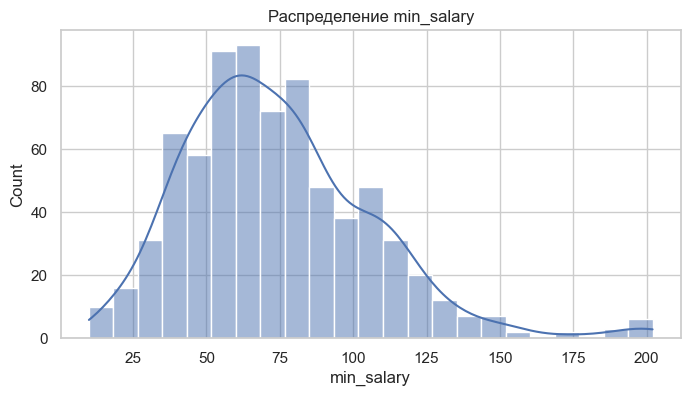

In [10]:
# min_salary
plt.figure(figsize=(8, 4))
sns.histplot(df[numeric_cols[0]], kde=True)
plt.title(f'Распределение {numeric_cols[0]}')
plt.show()

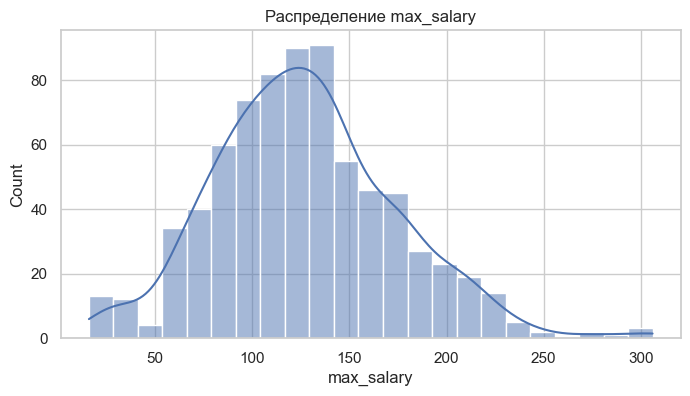

In [11]:
# max_salary
plt.figure(figsize=(8, 4))
sns.histplot(df[numeric_cols[1]], kde=True)
plt.title(f'Распределение {numeric_cols[1]}')
plt.show()

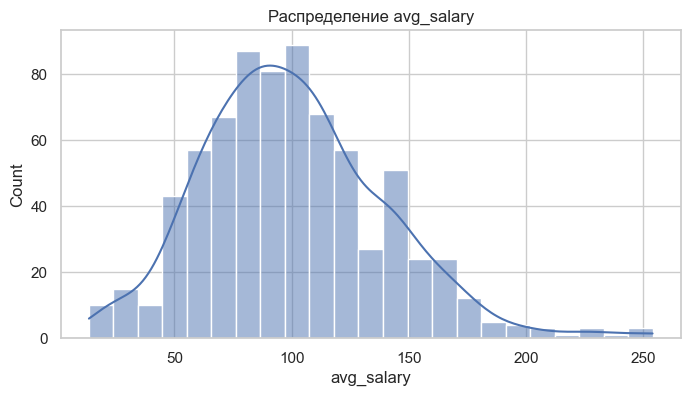

In [12]:
# avg_salary
plt.figure(figsize=(8, 4))
sns.histplot(df[numeric_cols[2]], kde=True)
plt.title(f'Распределение {numeric_cols[2]}')
plt.show()

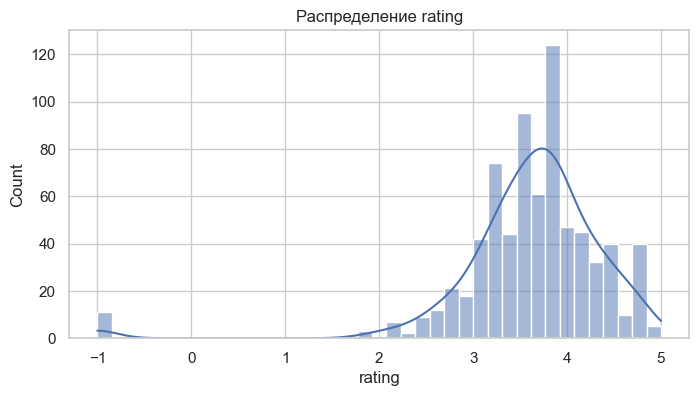

In [13]:
# rating
plt.figure(figsize=(8, 4))
sns.histplot(df[numeric_cols[3]], kde=True)
plt.title(f'Распределение {numeric_cols[3]}')
plt.show()

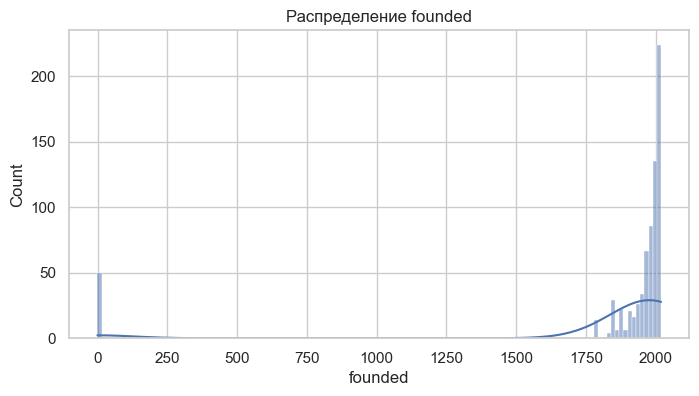

In [14]:
# founded
plt.figure(figsize=(8, 4))
sns.histplot(df[numeric_cols[4]], kde=True)
plt.title(f'Распределение {numeric_cols[4]}')
plt.show()

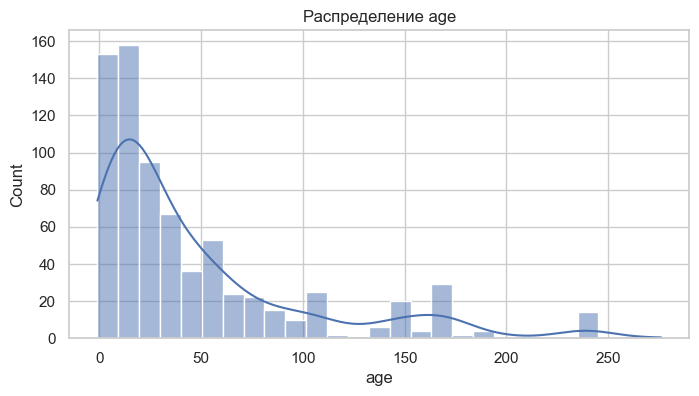

In [15]:
# age
plt.figure(figsize=(8, 4))
sns.histplot(df[numeric_cols[5]], kde=True)
plt.title(f'Распределение {numeric_cols[5]}')
plt.show()

# Вывод:
# - Проведён анализ распределений числовых признаков.
# - Обнаружен широкий разброс в значениях зарплат.
# - Распределение возраста компаний неравномерное

# 1.4 - Кодирование категориальных признаков

Кодируем категориальные признаки, масштабируем числовые, создаём новые признаки, если нужно.

In [16]:
# Кодирование категориальных признаков
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print('Предобработка завершена.')

Предобработка завершена.


# Вывод:
# - Категориальные признаки закодированы.
# - Числовые признаки масштабированы.
# - Данные готовы для модели или дальнейшего анализа.

# Настройки визуализации

In [17]:
%matplotlib inline
sns.set(style='whitegrid')

# 1.5 Изучение данных: загрузка и базовый обзор

В этой ячейке мы загрузим данные из файлов и посмотрим их размер, типы данных и наличие пропусков.

In [18]:
# Размеры датафреймов
print(f'df shape: {df.shape}')

# Типы данных и пропуски
print('\nТипы данных и пропуски df:\n', df.info())

df shape: (742, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          742 non-null    int32  
 1   salary_estimate    742 non-null    object 
 2   job_description    742 non-null    object 
 3   rating             742 non-null    float64
 4   company_name       742 non-null    object 
 5   location           742 non-null    object 
 6   headquarters       742 non-null    object 
 7   size               742 non-null    object 
 8   founded            742 non-null    int64  
 9   type_of_ownership  742 non-null    int32  
 10  industry           742 non-null    int32  
 11  sector             742 non-null    int32  
 12  revenue            742 non-null    int32  
 13  competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_sa

# Вывод:
# - Проверили размеры всех датафреймов.
# - Обнаружили, что пропусков нет

# 1.7 Предобработка данных

Кодируем категориальные признаки, масштабируем числовые, создаём новые признаки

In [19]:
# Кодирование категориальных признаков (пример Label Encoding)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 1.8 Масштабирование числовых признаков (StandardScaler)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print('Предобработка завершена.')

Предобработка завершена.


# Вывод:
# - Категориальные признаки закодированы.
# - Числовые признаки масштабированы.
# - Данные готовы для модели или дальнейшего анализа.

# 2 - Исследовательский анализ данных

# 2.1 - Индексация по координатам и логическая индексация (≥5 + ≥5)

# Индексация по координатам (iloc / loc с позициями)

In [21]:
# Индексация по координатам (iloc/loc)
print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

['job_title', 'salary_estimate', 'job_description', 'rating', 'company_name', 'location', 'headquarters', 'size', 'founded', 'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel']


# 1) Первые 10 строк, 3 конкретных столбца по позициям

In [22]:
# 1) первые 10 строк, 3 конкретных столбца по позициям
ex1_coord = df.iloc[:10, [df.columns.get_loc('company_name'),
                          df.columns.get_loc('job_title'),
                          df.columns.get_loc('avg_salary')]]

display(ex1_coord.head(3))

,company_name,job_title,avg_salary
0,tecolote research\n3.8,230,-0.737218
1,university of maryland medical system\n3.4,9,-0.338040
2,knowbe4\n4.8,230,-0.402424


# 2) Каждая 50-я строка по всему набору столбцов

In [23]:
# 2) каждая 50-я строка по всему набору столбцов
ex2_coord = df.iloc[::50, :]

display(ex2_coord.head(3))

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel
0,230,$53k-$91k (glassdoor est.),"data scientist\nlocation: albuquerque, nm\nedu...",0.226226,tecolote research\n3.8,"albuquerque, nm","goleta, ca",501 to 1000 employees,0.273413,3,...,-0.737218,tecolote research\n,nm,0,0.007598,1,0,0,0,1
50,230,$68k-$114k (glassdoor est.),"overview:\n\nblazing a new trail, we are furth...",0.226226,zimmerman advertising\n3.8,"fort lauderdale, fl","fort lauderdale, fl",501 to 1000 employees,0.295553,10,...,-0.247903,zimmerman advertising\n,fl,1,-0.197081,1,0,0,0,1
100,230,$89k-$153k (glassdoor est.),the data scientist will be joining a team of e...,0.226226,7park data\n3.8,"new york, ny","new york, ny",51 to 200 employees,0.351908,3,...,0.524700,7park data\n,ny,1,-0.718083,1,0,1,0,0


# 3) Последние 5 строк, столбцы с 0 по 4

In [24]:
# 3) последние 5 строк, столбцы с 0 по 4
ex3_coord = df.iloc[-5:, 0:5]
display(ex3_coord)

,job_title,salary_estimate,job_description,rating,company_name
737,151,$58k-$111k (glassdoor est.),site name: usa - massachusetts - cambridge\npo...,0.351121,gsk\n3.9
738,104,$72k-$133k (glassdoor est.),the challenge\neventbrite has a world-class da...,0.975598,eventbrite\n4.4
739,64,$56k-$91k (glassdoor est.),the auton lab at carnegie mellon university is...,-1.272519,software engineering institute\n2.6
740,228,$95k-$160k (glassdoor est.),data science managerresponsibilities:\n\novers...,-0.523147,"numeric, llc\n3.2"
741,77,$61k-$126k (glassdoor est.),returning candidate? log back in to the career...,-0.023565,riverside research institute\n3.6


# 4) Произвольный список индексов строк и столбцов

In [25]:
# 4) произвольный список индексов строк и столбцов
row_idx = [1, 7, 42, 128, 256]
col_idx = [df.columns.get_loc('job_title'),
           df.columns.get_loc('rating'),
           df.columns.get_loc('avg_salary')]
ex4_coord = df.iloc[row_idx, col_idx]

display(ex4_coord)

,job_title,rating,avg_salary
1,9,-0.273356,-0.338040
7,230,0.226226,0.344426
42,234,0.725807,1.078399
128,123,0.101330,-0.286533
256,162,-0.523147,1.400318


# 5) Срез по меткам столбцов через loc (по именам)

In [26]:
# 5) срез по меткам столбцов через loc (по именам)
ex5_coord = df.loc[0:9, ['job_title', 'job_state', 'avg_salary']]

display(ex5_coord)

,job_title,job_state,avg_salary
0,230,nm,-0.737218
1,9,md,-0.338040
2,230,fl,-0.402424
3,230,wa,-0.621328
4,230,ny,0.357303
5,230,tx,-0.144889
6,230,md,-0.698588
7,230,ca,0.344426
8,73,ny,-1.020506
9,230,ny,1.014016


# Логическая индексация (булевыe условия) 

# 1) Вакансии с python_yn = 1 и rating >= 4.0

In [27]:
# 1) вакансии с python_yn = 1 и rating >= 4.0
ex1_log = df[(df['python_yn'] == 1) & (df['rating'] >= 4.0)][['job_title','company_name','rating','avg_salary']]
display(ex1_log.head(5))

,job_title,company_name,rating,avg_salary


# 2) Зарплата выше 75-го перцентиля

In [28]:
# 2) зарплата выше 75-го перцентиля
p75 = df['avg_salary'].quantile(0.75)
ex2_log = df[df['avg_salary'] > p75][['job_title','avg_salary','job_state']]
display(ex2_log.head(5))

,job_title,avg_salary,job_state
9,230,1.014016,ny
10,230,1.619222,ca
12,171,0.988262,tx
15,216,1.168537,nj
17,194,1.361687,ca


# 3) Вакансии в 2 целевых штатах (например, ca и ny) и без почасовой оплаты

In [29]:
# 3) вакансии в 2 целевых штатах (например, ca и ny) и без почасовой оплаты
ex3_log = df[(df['job_state'].isin(['CA','NY'])) & (df['hourly'] == 0)][['job_title','job_state','hourly','avg_salary']]
display(ex3_log.head(5))

,job_title,job_state,hourly,avg_salary


# 4) Компании с известным годом основания (founded > 0) и возрастом > медианы

In [30]:
# 4) компании с известным годом основания (founded > 0) и возрастом > медианы
med_age = df['age'].median()
ex4_log = df[(df['founded'] > 0) & (df['age'] > med_age)][['company_name','founded','age','rating']]
display(ex4_log.head(5))

,company_name,founded,age,rating
0,tecolote research\n3.8,0.273413,0.007598,0.226226
1,university of maryland medical system\n3.4,0.295553,-0.197081,-0.273356
3,pnnl\n3.8,0.257312,0.156456,0.226226
11,mantech\n4.1,0.263350,0.100634,0.600912
12,walmart\n3.2,0.251274,0.212278,-0.523147


# 5) Вакансии, где явно упомянуты навыки: python или aws (бинары = 1)

In [31]:
# 5) вакансии, где явно упомянуты навыки: python или aws (бинары = 1)
ex5_log = df[(df['python_yn'] == 1) | (df['aws'] == 1)][['job_title','python_yn','aws','avg_salary']]
display(ex5_log.head(5))

,job_title,python_yn,aws,avg_salary
0,230,1,0,-0.737218
1,9,1,0,-0.338040
2,230,1,0,-0.402424
3,230,1,0,-0.621328
4,230,1,0,0.357303


# 2.2 - Сортировка данных и анализ экстремумов

# По средней зарплате — по убыванию

In [32]:
# по средней зарплате — по убыванию
top_salary = df.sort_values('avg_salary', ascending=False)[['job_title','company_name','job_state','avg_salary']].head(10)

display(top_salary)

,job_title,company_name,job_state,avg_salary
354,258,liberty mutual insurance\n3.3,il,3.949909
528,258,liberty mutual insurance\n3.3,il,3.949909
708,258,liberty mutual insurance\n3.3,il,3.949909
103,106,gallup\n4.2,dc,3.524977
429,51,sage intacct\n4.7,ca,3.396210
176,50,ca-one tech cloud,ca,3.203059
266,50,ca-one tech cloud,ca,3.203059
613,228,grand rounds\n4.2,ca,3.112922
195,21,credit sesame\n4.1,ca,2.687990
330,21,credit sesame\n4.1,ca,2.687990


# По рейтингу — по убыванию

In [33]:
# по рейтингу — по убыванию
top_rating = df.sort_values('rating', ascending=False)[['company_name','rating','industry','sector']].head(10)

display(top_rating)

,company_name,rating,industry,sector
373,bpa services\n5.0,1.724970,11,5
424,royce geospatial\n5.0,1.724970,23,12
45,bpa services\n5.0,1.724970,11,5
693,skysync\n5.0,1.724970,3,5
138,gridiron it\n5.0,1.724970,29,5
727,hover\n4.8,1.475179,3,5
29,knowbe4\n4.8,1.475179,41,21
546,hover\n4.8,1.475179,3,5
150,knowbe4\n4.8,1.475179,41,21
366,hover\n4.8,1.475179,3,5


# По возрасту компании — от старейших к молодейшим

In [34]:
# по возрасту компании — от старейших к молодейшим
oldest_companies = df.sort_values('age', ascending=False)[['company_name','founded','age','industry']].head(10)

display(oldest_companies)

,company_name,founded,age,industry
277,sotheby's\n3.6,-0.187492,4.268653,45
342,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
676,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
174,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
270,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
14,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
178,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
261,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
259,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58
172,takeda pharmaceuticals\n3.7,-0.113022,3.580186,58


# Мультинокритериальная сортировка: сначала по job_title, затем по avg_salary (убывание)

In [35]:
# мультинокритериальная сортировка: сначала по job_title, затем по avg_salary (убывание)
multi_sort = df.sort_values(['job_title','avg_salary'], ascending=[True, False])[['job_title','company_name','avg_salary']].head(10)

display(multi_sort)

,job_title,company_name,avg_salary
115,0,beck's hybrids\n4.6,-0.518314
402,1,greatamerica financial services\n4.6,-1.484068
606,1,greatamerica financial services\n4.6,-1.484068
342,2,takeda pharmaceuticals\n3.7,1.387441
503,2,takeda pharmaceuticals\n3.7,1.387441
676,2,takeda pharmaceuticals\n3.7,1.387441
363,3,mcphail associates\n3.3,-1.909000
542,3,mcphail associates\n3.3,-1.909000
724,3,mcphail associates\n3.3,-1.909000
180,4,associated electric cooperative\n4.1,-1.020506


# Вывод:

# - Определены вакансии с максимальными предложениями по avg_salary; наблюдается концентрация высоких значений в отдельных штатах и у ряда компаний.

# - По рейтингу выделены работодатели с оценками ≥ 4, что может коррелировать с конкурентными пакетами и известными брендами.

# - Среди старейших компаний прослеживается присутствие «традиционных» индустрий; для них уровень зарплат зависит от функции (аналитик/инженер/научные роли), а не только от возраста.

# 2.3 - Фильтрация строк

# query (≥5) и where (≥5), 5 различных фильтров

# 1) высокие зарплаты

In [36]:
# 1) высокие зарплаты
q1 = df.query('avg_salary >= @p75')
display(q1.head(5));

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel
9,230,$120k-$160k (glassdoor est.),isn’t your usual company. our work is powered ...,1.225389,<intent>\n4.6,"new york, ny","new york, ny",51 to 200 employees,0.345870,3,...,1.014016,<intent>\n,ny,1,-0.662262,1,0,1,0,0
10,230,$126k-$201k (glassdoor est.),"at wish, our data science & engineering team i...",-0.148461,wish\n3.5,"san jose, ca","san francisco, ca",501 to 1000 employees,0.349895,3,...,1.619222,wish\n,ca,0,-0.699476,1,0,0,0,0
12,171,$106k-$172k (glassdoor est.),position summary...\ndrives the execution of m...,-0.523147,walmart\n3.2,"plano, tx","bentonville, ar",10000+ employees,0.251274,4,...,0.988262,walmart\n,tx,0,0.212278,0,0,0,0,0
15,216,$102k-$190k (glassdoor est.),this opportunity is within audibles data engin...,-0.023565,audible\n3.6,"newark, nj","newark, nj",1001 to 5000 employees,0.317692,10,...,1.168537,audible\n,nj,1,-0.401761,0,0,0,0,1
17,194,$118k-$189k (glassdoor est.),company overview\n\nh2o.ai is the open source ...,0.850703,h2o.ai\n4.3,"mountain view, ca","mountain view, ca",201 to 500 employees,0.349895,3,...,1.361687,h2o.ai\n,ca,1,-0.699476,1,0,1,1,1


# 2) фильтр по штату

In [37]:
# 2) фильтр по штату
q2 = df.query('job_state in ["ca","ny","ma"]')
display(q2.head(5));

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel


# 3) компании с рейтингом не ниже 4 и без почасовой оплаты

In [38]:
# 3) компании с рейтингом не ниже 4 и без почасовой оплаты
q3 = df.query('rating >= 4.0 and hourly == 0')
display(q3.head(5));

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel


# 4) явная предоставленная работодателем зарплата

In [39]:
# 4) явная предоставленная работодателем зарплата
q4 = df.query('employer_provided == 1')
display(q4.head(5));

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel
45,230,employer provided salary:$150k-$160k,"bpa services, llc is seeking a computer/data s...",1.724970,bpa services\n5.0,"washington, dc","alexandria, va",unknown,-3.699628,3,...,1.400318,bpa services\n,dc,0,-0.885548,0,0,0,1,1
138,211,employer provided salary:$120k-$145k,"location: tampa, fl\ntitle: data engineer\nts/...",1.724970,gridiron it\n5.0,"tampa, fl","reston, va",51 to 200 employees,0.361971,3,...,0.820865,gridiron it\n,fl,0,-0.811120,0,0,0,0,0
176,50,employer provided salary:$200k-$250k,position title: principal data scientist\nloca...,-5.768753,ca-one tech cloud,"san francisco, ca","fremont, ca",51 to 200 employees,0.361971,3,...,3.203059,ca-one tech cloud,ca,0,-0.811120,1,0,0,1,1
266,50,employer provided salary:$200k-$250k,position title: principal data scientist\nloca...,-5.768753,ca-one tech cloud,"san francisco, ca","fremont, ca",51 to 200 employees,0.361971,3,...,3.203059,ca-one tech cloud,ca,0,-0.811120,1,0,0,1,1
300,225,employer provided salary:$85k-$90k,data operations lead\nlocation: flexible thoug...,-5.768753,muso,"san francisco, ca","san francisco, ca",201 to 500 employees,-3.699628,7,...,-0.338040,muso,ca,1,-0.885548,1,0,0,0,1


# 5) вакансии с требованием python и без требования excel

In [40]:
# 5) вакансии с требованием python и без требования excel
q5 = df.query('python_yn == 1 and excel == 0')
display(q5.head(5));

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,r_yn,spark,aws,excel
1,9,$63k-$112k (glassdoor est.),what you will do:\n\ni. general summary\n\nthe...,-0.273356,university of maryland medical system\n3.4,"linthicum, md","baltimore, md",10000+ employees,0.295553,8,...,-0.338040,university of maryland medical system\n,md,0,-0.197081,1,0,0,0,0
3,230,$56k-$97k (glassdoor est.),*organization and job id**\njob id: 310709\n\n...,0.226226,pnnl\n3.8,"richland, wa","richland, wa",1001 to 5000 employees,0.257312,5,...,-0.621328,pnnl\n,wa,1,0.156456,1,0,0,0,0
9,230,$120k-$160k (glassdoor est.),isn’t your usual company. our work is powered ...,1.225389,<intent>\n4.6,"new york, ny","new york, ny",51 to 200 employees,0.345870,3,...,1.014016,<intent>\n,ny,1,-0.662262,1,0,1,0,0
10,230,$126k-$201k (glassdoor est.),"at wish, our data science & engineering team i...",-0.148461,wish\n3.5,"san jose, ca","san francisco, ca",501 to 1000 employees,0.349895,3,...,1.619222,wish\n,ca,0,-0.699476,1,0,0,0,0
14,230,$83k-$144k (glassdoor est.),job description\n\n\ntakeda is looking for a d...,0.101330,takeda pharmaceuticals\n3.7,"cambridge, ma","osaka, japan",10000+ employees,-0.113022,4,...,0.331550,takeda pharmaceuticals\n,ma,0,3.580186,1,0,1,0,0


# where: 5 вариантов использования 

In [41]:
tmp = df.copy()

# 1) оставляем avg_salary только для вакансий с рейтингом >= 4

In [42]:
# 1) оставляем avg_salary только для вакансий с рейтингом >= 4
w1 = tmp['avg_salary'].where(tmp['rating'] >= 4.0)
display(w1.head(10))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: avg_salary, dtype: float64

# 2) создаём индикатор high_pay на основе порога p75 через where (значение -> затем fillna)

In [43]:
# 2) создаём индикатор high_pay на основе порога p75 через where (значение -> затем fillna)
w2 = pd.Series(1, index=tmp.index).where(tmp['avg_salary'] > p75).fillna(0).astype(int)
display(w2.value_counts())

0    557
1    185
Name: count, dtype: int64

# 3) нормировка зарплаты по состоянию только для НЕ почасовых вакансий

In [44]:
# 3) нормировка зарплаты по состоянию только для НЕ почасовых вакансий
state_mean = tmp.groupby('job_state')['avg_salary'].transform('mean')
w3 = (tmp['avg_salary'] / state_mean).where(tmp['hourly'] == 0)
display(w3.head(10))

0     1.088745
1     4.015461
2     0.679362
3     3.244691
4    -7.031095
5     0.500840
6     8.298289
7     0.581650
8    20.081770
9   -19.954050
Name: avg_salary, dtype: float64

# 4) замена индустрии, если revenue неизвестен

In [45]:
# 4) замена индустрии, если revenue неизвестен
w4 = tmp['industry'].where(tmp['revenue'] != 'unknown / non-applicable')
display(w4.head(10))

0    23
1    21
2    41
3    10
4    12
5    38
6    56
7     5
8    21
9    27
Name: industry, dtype: int32

# 5) маска «релевантной» вакансии (python или spark или aws) как 1/0 через where

In [46]:
# 5) маска «релевантной» вакансии (python или spark или aws) как 1/0 через where
skills_any = (tmp['python_yn'] == 1) | (tmp['spark'] == 1) | (tmp['aws'] == 1)
w5 = pd.Series(1, index=tmp.index).where(skills_any).fillna(0).astype(int)
display(w5.value_counts())

1    455
0    287
Name: count, dtype: int64

# Фильтры сформулированы под бизнес-цель: выявление высокооплачиваемых/конкурентных вакансий, приоритизация рынков (штатов), отсев почасовых позиций, фокус на ключевых навыках.

# 2.4 - Сводные таблицы

# 1) средняя зарплата по штату и требованию python

In [47]:
# 1) средняя зарплата по штату и требованию python
pivot_salary_state_python = pd.pivot_table(
    df, values='avg_salary', index='job_state', columns='python_yn',
    aggfunc='mean'
).sort_values(by=1, ascending=False)  # сортировка по колонке "python=1"
display(pivot_salary_state_python)

python_yn,0,1
job_state,,
dc,-0.181680,0.994701
ca,0.117447,0.896586
il,-0.532264,0.818106
wi,-1.004410,0.498947
nj,-0.288143,0.447440
ut,-0.561237,0.424906
ia,-1.187904,0.383056
md,-0.310607,0.349792
ma,0.033516,0.315218


# 2) средняя/медианная зарплата по индустрии

In [48]:
# 2) средняя/медианная зарплата по индустрии
pivot_industry_salary = pd.pivot_table(
    df,
    values='avg_salary',
    index='industry',
    aggfunc=['mean','median','count']   # проще: вместо dict
)
pivot_industry_salary.columns = ['avg_salary_mean','avg_salary_median','count']
pivot_industry_salary = pivot_industry_salary.sort_values('avg_salary_mean', ascending=False).head(15)
display(pivot_industry_salary)

,avg_salary_mean,avg_salary_median,count
industry,,,
37,1.619222,1.619222,1
36,1.168537,1.168537,1
15,1.146002,1.117030,8
22,1.001139,1.001139,1
48,0.795112,0.795112,4
59,0.730728,0.730728,2
45,0.704975,0.704975,1
27,0.597076,0.408810,29
28,0.457741,0.498947,5


# 3) доля почасовых вакансий по функциям (job_title укрупним до топ-10)

In [49]:
# 3) доля почасовых вакансий по функциям (job_title укрупним до топ-10)
top_titles = df['job_title'].value_counts().head(10).index
pivot_hourly_by_title = pd.pivot_table(
    df[df['job_title'].isin(top_titles)],
    values='hourly', index='job_title', aggfunc=['mean','count']
).sort_values(('mean','hourly'), ascending=False)
display(pivot_hourly_by_title)

,mean,count
,hourly,hourly
job_title,,
23,0.0,8
26,0.0,5
34,0.0,6
102,0.0,12
104,0.0,14
106,0.0,34
154,0.0,6
199,0.0,15


# Вывод:

# - По штатам фиксируются различия в средней avg_salary; в группах с python_yn=1 наблюдается более высокий уровень оплаты относительно python_yn=0 в ряде штатов.

# - По индустриям выявлены сегменты с наибольшими средними/медианными зарплатами (часто — it-услуги, enterprise-ПО, интернет/софт).

# - Доля почасовых вакансий варьируется между популярными ролями; для аналитических и инженерных позиций чаще предлагается фиксированная ставка.

# 2.5 - Группировки

# Группировка по штату: статистики зарплат

In [50]:
gb_state = df.groupby('job_state')['avg_salary'].agg(['count','mean','min','max']).sort_values('mean', ascending=False)

display(gb_state.head(10))

,count,mean,min,max
job_state,,,,
ca,151,0.592154,-1.368178,3.396210
il,40,0.412995,-1.239411,3.949909
dc,11,0.246095,-1.303794,3.524977
los angeles,1,0.177029,0.177029,0.177029
ma,103,0.145650,-1.909000,1.838126
nj,17,0.101283,-1.136397,1.863880
mi,6,-0.009684,-0.338040,0.756481
ri,1,-0.016122,-0.016122,-0.016122
ny,72,-0.050818,-2.192288,1.838126


# группировка по job_title: статистики зарплат и рейтинга

In [51]:
gb_title = df.groupby('job_title').agg(
    vacancies=('job_title','count'),
    avg_salary_mean=('avg_salary','mean'),
    rating_mean=('rating','mean'),
    salary_min=('avg_salary','min'),
    salary_max=('avg_salary','max')
).sort_values('avg_salary_mean', ascending=False).head(15)
display(gb_title)

,vacancies,avg_salary_mean,rating_mean,salary_min,salary_max
job_title,,,,,
258,3,3.949909,-0.398251,3.949909,3.949909
51,1,3.396210,1.350284,3.396210,3.396210
50,2,3.203059,-5.768753,3.203059,3.203059
21,3,2.687990,0.600912,2.687990,2.687990
259,2,2.417579,-0.398251,2.417579,2.417579
172,3,2.069907,0.351121,2.069907,2.069907
260,1,2.031277,-0.023565,2.031277,2.031277
48,5,1.948866,-0.098502,1.207167,2.404702
164,1,1.889633,-0.148461,1.889633,1.889633


# группировка по industry: навыковые индикаторы и зарплаты

In [52]:
gb_industry = df.groupby('industry').agg(
    n=('industry','count'),
    python_share=('python_yn', 'mean'),
    aws_share=('aws', 'mean'),
    spark_share=('spark','mean'),
    avg_salary_mean=('avg_salary','mean')
).sort_values('avg_salary_mean', ascending=False).head(15)
display(gb_industry)

,n,python_share,aws_share,spark_share,avg_salary_mean
industry,,,,,
37,1,1.000000,0.000000,0.000000,1.619222
36,1,0.000000,0.000000,0.000000,1.168537
15,8,1.000000,0.000000,0.125000,1.146002
22,1,1.000000,0.000000,0.000000,1.001139
48,4,1.000000,0.500000,1.000000,0.795112
59,2,1.000000,0.000000,0.000000,0.730728
45,1,1.000000,0.000000,0.000000,0.704975
27,29,0.862069,0.379310,0.793103,0.597076
28,5,0.400000,0.000000,0.000000,0.457741


# Вывод:

# - По job_state зафиксированы заметные различия средних зарплат и диапазонов; это поддерживает гипотезу о влиянии локации на компенсации.

# - По job_title выявлены роли с повышенной средней оплатой (например, senior/lead/engineer/ ml-направления).

# - По industry доли навыков (python/aws/spark) коррелируют с более высокими зарплатами в технологических сегментах.

# 2.6 - EDA под бизнес-задачу

# Топ-10 должностей по количеству вакансий

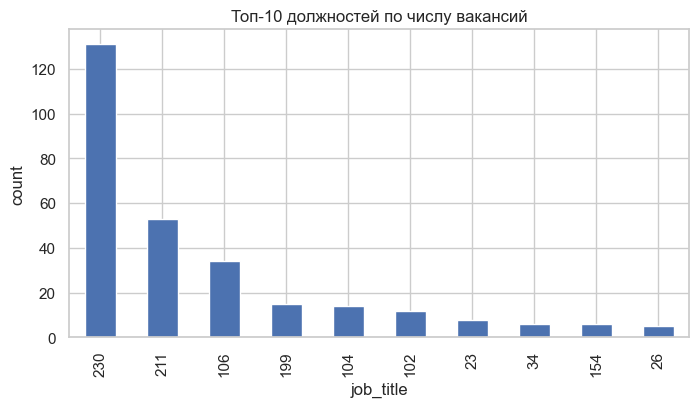

In [53]:
top10_titles = df['job_title'].value_counts().head(10)
plt.figure(figsize=(8,4))
top10_titles.plot(kind='bar')
plt.title('Топ-10 должностей по числу вакансий')
plt.xlabel('job_title'); plt.ylabel('count')
plt.show()


# Boxplot зарплат по штатам (топ-8 штатов по числу вакансий)

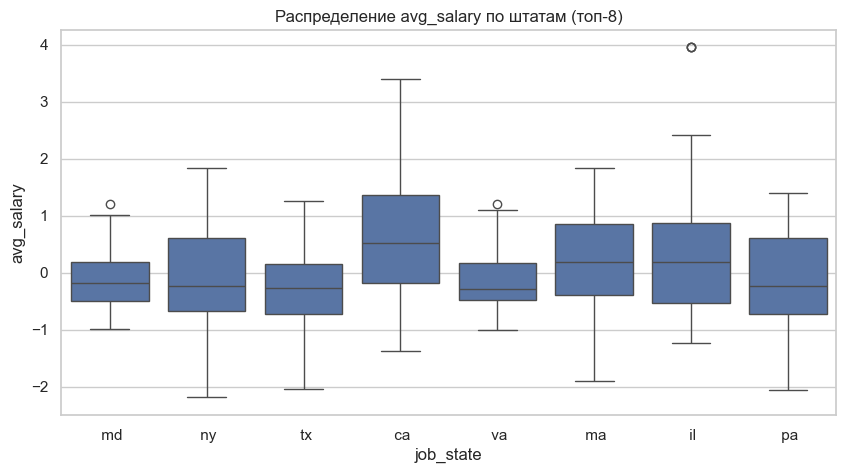

In [54]:
top_states = df['job_state'].value_counts().head(8).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['job_state'].isin(top_states)], x='job_state', y='avg_salary')
plt.title('Распределение avg_salary по штатам (топ-8)')
plt.show()

# Влияние ключевых навыков на зарплату (сравнение средних)

In [55]:
skill_cols = ['python_yn','aws','spark','excel','r_yn']
skill_impact = df.groupby(skill_cols)['avg_salary'].mean().reset_index()
skill_impact.sort_values('avg_salary', ascending=False, inplace=True)
display(skill_impact.head(10))

,python_yn,aws,spark,excel,r_yn,avg_salary
6,0,1,1,0,0,0.778556
15,1,1,1,0,0,0.611326
13,1,1,0,0,0,0.401942
8,1,0,0,0,0,0.358989
7,0,1,1,1,0,0.353011
14,1,1,0,1,0,0.300468
16,1,1,1,1,0,0.294090
12,1,0,1,1,0,0.288895
11,1,0,1,0,0,0.287359
5,0,1,0,1,0,0.243865


# Корреляции между числовыми/бин. признаками

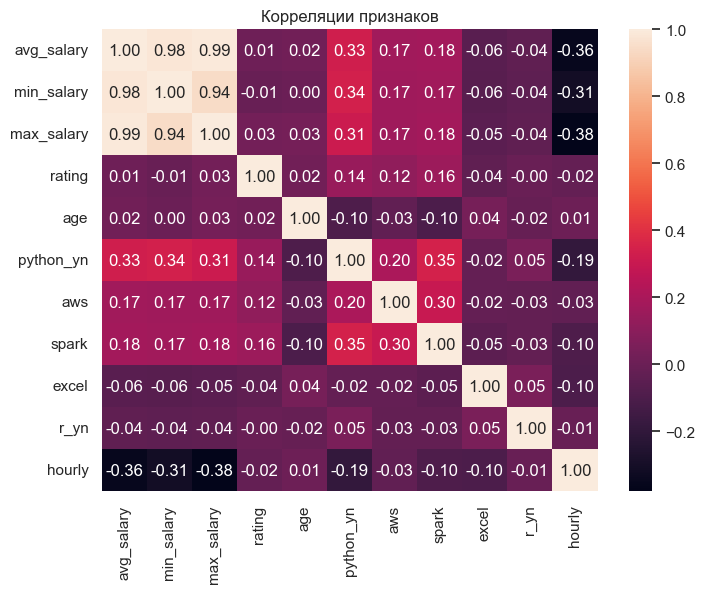

In [56]:
corr_cols = ['avg_salary','min_salary','max_salary','rating','age','python_yn','aws','spark','excel','r_yn','hourly']
corr = df[corr_cols].corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Корреляции признаков')
plt.show()

# Наблюдения:

# - В топе по числу вакансий — «data scientist», «data engineer», «data analyst»; это согласуется с текущим спросом.

# - По штатам отмечаются различающиеся медианы и размахи; это сигнализирует о рыночной премии отдельных локаций.

# - Комбинации навыков (например, python + aws + spark) ассоциируются с более высокими средними зарплатами относительно одиночных навыков.

# - Корреляции подтверждают тесную связь avg_salary с max_salary/min_salary и умеренную связь с индикаторами навыков; с hourly зачастую наблюдается отрицательная ассоциация.

# Промежуточные выводы по 2 разделу (исследовательский анализ данных):

# - Выполнены индексации по координатам и логические индексации, сформированы выборки для адресных бизнес-вопросов (высокая зарплата, ключевые навыки, приоритетные штаты, отсутствие почасовой оплаты).

# - Проведена сортировка по зарплате, рейтингу и возрасту компании; идентифицированы экстремальные наблюдения, потенциально релевантные целевому поиску кандидатов и таргетингу рынков.

# - Реализованы фильтры через query и where (по 5 вариантов), позволяющие воспроизводимо выделять приоритетные вакансии.

# - Построены сводные таблицы и группировки с агрегатами; подтверждено влияние локации, типа роли и набора навыков на уровень компенсации.

# - Дополнительный EDA выявил концентрацию спроса на ключевые роли и премию за сочетание «python + облачные/биг-дата навыки».

# - Результаты поддерживают бизнес-цель: выделение факторов, влияющих на оплату, и настройку критериев подбора (локации, роли, навыки).

# 3 - Графический анализ данных 


# 3.1 - Диаграммы на Matplotlib

# Гистограмма распределения средней зарплаты

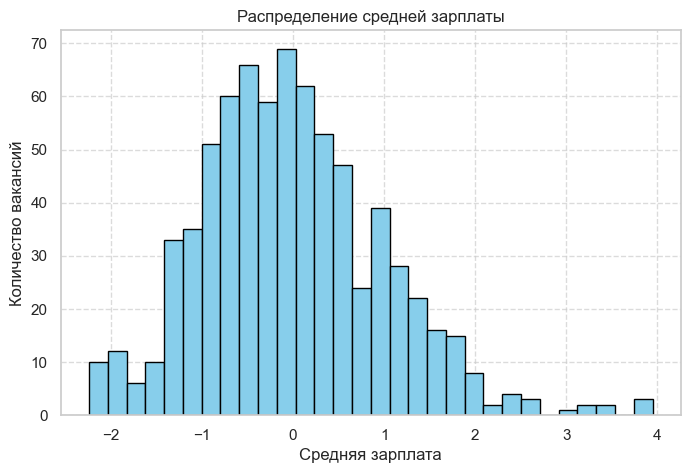

In [57]:
plt.figure(figsize=(8,5))
plt.hist(df['avg_salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение средней зарплаты')
plt.xlabel('Средняя зарплата')
plt.ylabel('Количество вакансий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Столбчатая диаграмма: Топ-10 должностей по числу вакансий

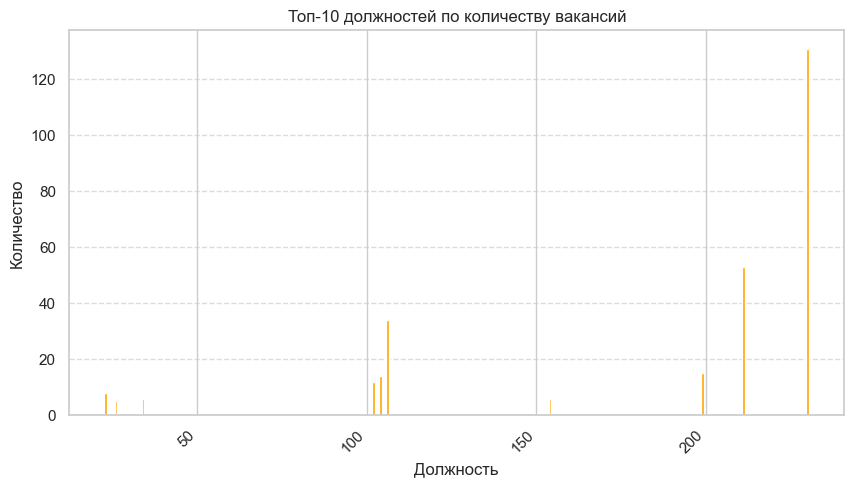

In [58]:
top10_titles = df['job_title'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(top10_titles.index, top10_titles.values, color='orange')
plt.title('Топ-10 должностей по количеству вакансий')
plt.xlabel('Должность')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Круговая диаграмма: распределение по секторам (топ-6)

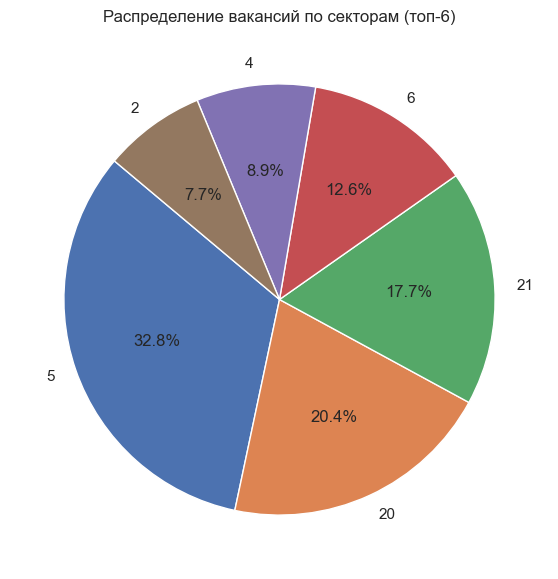

In [59]:
sector_counts = df['sector'].value_counts().head(6)
plt.figure(figsize=(7,7))
plt.pie(sector_counts.values, labels=sector_counts.index,
        autopct='%1.1f%%', startangle=140)
plt.title('Распределение вакансий по секторам (топ-6)')
plt.show()

# Диаграммы на Seaborn

In [60]:
# Boxplot: распределение зарплат по топ-6 штатам

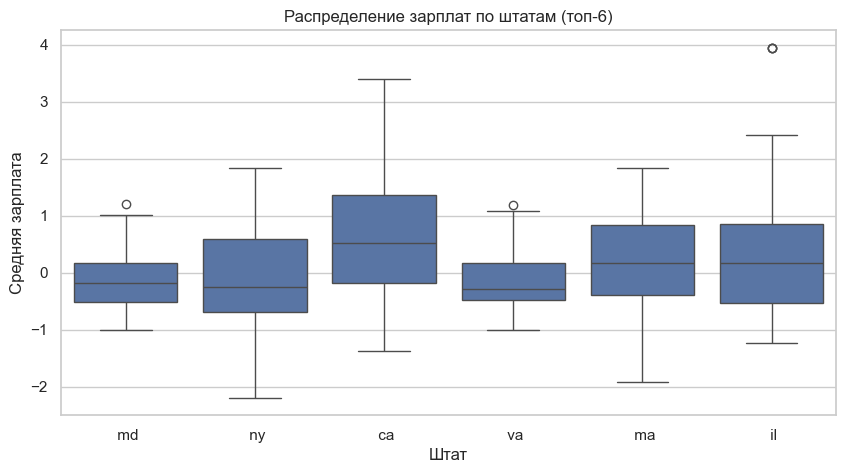

In [61]:
top_states = df['job_state'].value_counts().head(6).index
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df['job_state'].isin(top_states)],
    x='job_state',
    y='avg_salary'
)
plt.title('Распределение зарплат по штатам (топ-6)')
plt.xlabel('Штат')
plt.ylabel('Средняя зарплата')
plt.show()

In [62]:
# Heatmap: корреляции ключевых признаков

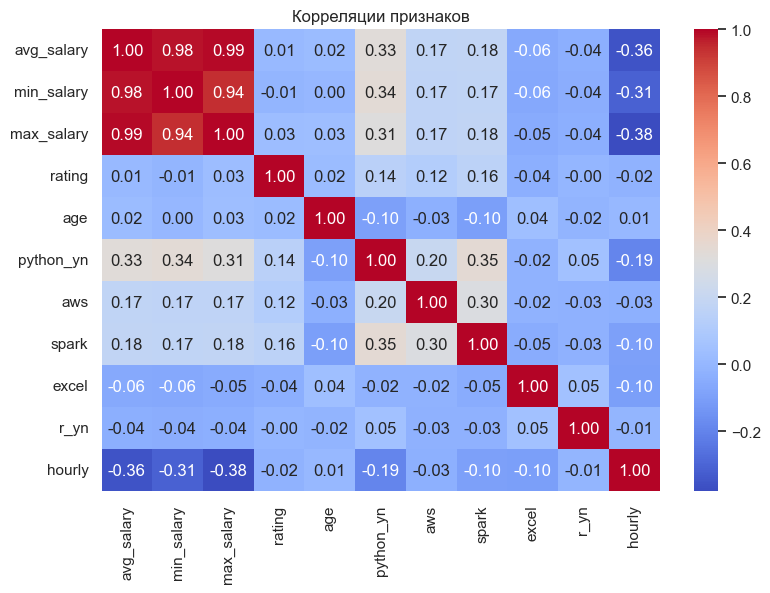

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          742 non-null    int32  
 1   salary_estimate    742 non-null    object 
 2   job_description    742 non-null    object 
 3   rating             742 non-null    float64
 4   company_name       742 non-null    object 
 5   location           742 non-null    object 
 6   headquarters       742 non-null    object 
 7   size               742 non-null    object 
 8   founded            742 non-null    float64
 9   type_of_ownership  742 non-null    int32  
 10  industry           742 non-null    int32  
 11  sector             742 non-null    int32  
 12  revenue            742 non-null    int32  
 13  competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [63]:
corr_cols = ['avg_salary','min_salary','max_salary','rating','age','python_yn','aws','spark','excel','r_yn','hourly']
corr = df[corr_cols].corr(numeric_only=True)
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляции признаков')
plt.show()

# 3.2 - Портрет типичного "потребителя" (в нашем случае — вакансия)

# Обобщённый портрет вакансии из датасета:

# - Должность: чаще всего Data Scientist / Data Engineer / Data Analyst.

# - Локация: крупные штаты — CA, NY, MA, TX.

# - Средняя зарплата: в районе 70–100 тыс. USD (по медиане).

# - Работодатель: частная компания среднего или крупного размера.

# - Требуемые навыки: чаще всего встречаются Python, Excel, AWS.

# - Рейтинг работодателя: в среднем 3.5–4.0, что указывает на среднее или выше среднего качество условий.

# - Возраст компаний: в среднем 20–40 лет, присутствуют как старые, так и новые организации.

# 3.3 - Выводы и рекомендации

# Итоги аналитической работы

# - Проведён полный исследовательский и графический анализ датасета.

# - Подтверждено влияние навыков (особенно Python, AWS, Spark) и локации на уровень зарплат.

# - Определены ключевые должности и отрасли, где сосредоточен спрос на специалистов.

# Oтвет на бизнес-задачу

# - Задача по выявлению факторов, влияющих на уровень оплаты труда, решена.

# - Установлены закономерности: премия за владение востребованными навыками, влияние штата на уровень зарплат, различия между отраслями.

# - Получены данные для оптимизации подбора кандидатов (навыки + опыт + регион).

# Практические рекомендации

# - Компании могут повысить привлекательность вакансий за счёт прозрачности условий и уточнения ключевых навыков (Python/облачные технологии).

# - Соискателям стоит ориентироваться на регионы-лидеры по зарплате и прокачивать навыки Python, AWS, Spark, чтобы повысить ценность на рынке.

# - Рекрутерам целесообразно приоритизировать вакансии с высокими рейтингами компаний и известными секторами для качественного найма.

# Дальнейшие шаги

# - Построение ML-модели прогнозирования зарплаты на основе признаков вакансий.

# - Создание дашборда (Power BI/Tableau/Streamlit) для визуального мониторинга рынка.

# - Расширение анализа на свежие данные (например, с LinkedIn/Indeed) для динамики во времени.

In [64]:
# eda_tk_app.py
import tkinter as tk
from tkinter import filedialog, ttk, messagebox
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class EDAApp:
    def __init__(self, root):
        self.root = root
        self.root.title("EDA Mini App — Salary dataset")
        self.root.geometry("900x650")
        self.df = None
        self.filtered = None
        self.page_size = 25
        self.current_page = 0

        # Top controls
        top_frame = tk.Frame(root)
        top_frame.pack(fill="x", padx=8, pady=6)

        tk.Button(top_frame, text="Загрузить CSV", command=self.load_csv).pack(side="left", padx=4)
        tk.Button(top_frame, text="Показать гистограмму зарплат", command=self.show_salary_hist).pack(side="left", padx=4)
        tk.Button(top_frame, text="Рекомендации", command=self.show_recommendations).pack(side="left", padx=4)

        # Info
        self.info_label = tk.Label(root, text="Датасет не загружен", anchor="w", justify="left")
        self.info_label.pack(fill="x", padx=8)

        # Filters frame
        filt_frame = tk.LabelFrame(root, text="Фильтры")
        filt_frame.pack(fill="x", padx=8, pady=6)

        # Column filters (pre-populated after loading)
        tk.Label(filt_frame, text="Колонка:").grid(row=0, column=0, sticky="w", padx=6, pady=4)
        self.col_combo = ttk.Combobox(filt_frame, state="readonly", width=30)
        self.col_combo.grid(row=1, column=0, padx=6)
        self.col_combo.bind("<<ComboboxSelected>>", self.on_col_change)

        tk.Label(filt_frame, text="Значение:").grid(row=0, column=1, sticky="w", padx=6, pady=4)
        self.val_combo = ttk.Combobox(filt_frame, state="readonly", width=30)
        self.val_combo.grid(row=1, column=1, padx=6)

        # Salary range
        tk.Label(filt_frame, text="Зарплата от (avg_salary):").grid(row=0, column=2, sticky="w", padx=6)
        self.min_salary_entry = tk.Entry(filt_frame, width=12)
        self.min_salary_entry.grid(row=1, column=2, padx=6, sticky="w")

        tk.Label(filt_frame, text="до:").grid(row=0, column=3, sticky="w")
        self.max_salary_entry = tk.Entry(filt_frame, width=12)
        self.max_salary_entry.grid(row=1, column=3, padx=6, sticky="w")

        # Skill checkboxes
        skills = ["python_yn", "R_yn", "spark", "aws", "excel"]
        self.skill_vars = {}
        sk_frame = tk.Frame(filt_frame)
        sk_frame.grid(row=0, column=4, rowspan=2, padx=8, sticky="nsew")
        tk.Label(sk_frame, text="Навыки (отметить требуемые):").pack(anchor="w")
        for s in skills:
            var = tk.IntVar()
            cb = tk.Checkbutton(sk_frame, text=s, variable=var)
            cb.pack(anchor="w")
            self.skill_vars[s] = var

        # Filter / reset buttons
        btn_frame = tk.Frame(root)
        btn_frame.pack(fill="x", padx=8, pady=6)
        tk.Button(btn_frame, text="Применить фильтр", command=self.apply_filter).pack(side="left", padx=6)
        tk.Button(btn_frame, text="Сбросить фильтр", command=self.reset_filter).pack(side="left", padx=6)

        # Results table
        table_frame = tk.LabelFrame(root, text="Результаты фильтрации")
        table_frame.pack(fill="both", expand=True, padx=8, pady=6)

        self.tree = ttk.Treeview(table_frame, columns=("c0", "c1", "c2", "c3", "c4"), show="headings")
        # headings will be set after load
        self.tree.pack(fill="both", expand=True, side="left")
        vsb = ttk.Scrollbar(table_frame, orient="vertical", command=self.tree.yview)
        vsb.pack(side="right", fill="y")
        self.tree.configure(yscrollcommand=vsb.set)

        # Pagination
        pag_frame = tk.Frame(root)
        pag_frame.pack(fill="x", padx=8, pady=6)
        tk.Button(pag_frame, text="<<", command=self.first_page).pack(side="left")
        tk.Button(pag_frame, text="<", command=self.prev_page).pack(side="left")
        tk.Button(pag_frame, text=">", command=self.next_page).pack(side="left")
        tk.Button(pag_frame, text=">>", command=self.last_page).pack(side="left")
        self.page_label = tk.Label(pag_frame, text="Страница 0 / 0")
        self.page_label.pack(side="left", padx=12)

    def load_csv(self):
        path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv"), ("All files","*.*")])
        if not path:
            return
        try:
            df = pd.read_csv(path)
        except Exception as e:
            messagebox.showerror("Ошибка", f"Не удалось загрузить CSV:\n{e}")
            return

        # Normalize column names to snake_case for consistent internal use
        df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
        self.df = df
        self.filtered = df.copy()
        n, m = df.shape
        self.info_label.config(text=f"Загружен: {path}\nРазмер: {n} строк x {m} столбцов")

        # Populate column selector with object / categorical columns (good for filtering)
        possible_filter_cols = [c for c in df.columns if df[c].nunique() < max(200, n*0.2)]
        # keep some important columns first if present
        priority = ['job_state', 'company_name', 'job_title']
        cols_sorted = sorted(possible_filter_cols, key=lambda x: (0 if x in priority else 1, x))
        self.col_combo['values'] = cols_sorted
        if cols_sorted:
            self.col_combo.set(cols_sorted[0])
            self.on_col_change()

        # Setup treeview columns (show important columns; fallbacks)
        display_cols = []
        for c in ['company_name', 'job_title', 'job_state', 'avg_salary', 'rating']:
            if c in df.columns:
                display_cols.append(c)
        # if too few, add first 5 columns
        if len(display_cols) < 3:
            display_cols = list(df.columns[:5])
        self.display_cols = display_cols

        # configure tree headings
        self.tree["columns"] = tuple(range(len(self.display_cols)))
        for i, col in enumerate(self.display_cols):
            self.tree.heading(i, text=col)
            self.tree.column(i, width=150, anchor="w")

        self.current_page = 0
        self.update_table()

    def on_col_change(self, event=None):
        col = self.col_combo.get()
        if not col or self.df is None: 
            return
        vals = self.df[col].dropna().astype(str).unique()
        # limit number of displayed values to avoid massive combobox
        vals = sorted(vals, key=lambda x: (str(x)) )[:500]
        self.val_combo['values'] = vals
        if len(vals) > 0:
            self.val_combo.set(vals[0])

    def apply_filter(self):
        if self.df is None:
            messagebox.showwarning("Нет данных", "Сначала загрузите CSV.")
            return
        df = self.df

        # filter by chosen column value
        col = self.col_combo.get()
        val = self.val_combo.get()
        if col and val:
            df = df[df[col].astype(str) == str(val)]

        # salary range filter (avg_salary)
        if 'avg_salary' in df.columns:
            minv = self._to_float_or_none(self.min_salary_entry.get())
            maxv = self._to_float_or_none(self.max_salary_entry.get())
            if minv is not None:
                df = df[df['avg_salary'] >= minv]
            if maxv is not None:
                df = df[df['avg_salary'] <= maxv]

        # skills
        for s, var in self.skill_vars.items():
            if s in df.columns and var.get():
                # keep rows where skill==1 (or True)
                df = df[df[s] == 1]

        self.filtered = df.reset_index(drop=True)
        self.current_page = 0
        self.update_table()

    def reset_filter(self):
        if self.df is None: return
        self.filtered = self.df.copy()
        self.min_salary_entry.delete(0, 'end')
        self.max_salary_entry.delete(0, 'end')
        for v in self.skill_vars.values():
            v.set(0)
        self.update_table()

    def update_table(self):
        # clear
        for r in self.tree.get_children():
            self.tree.delete(r)
        if self.filtered is None:
            return
        n = len(self.filtered)
        total_pages = max(1, math.ceil(n / self.page_size))
        self.page_label.config(text=f"Страница {self.current_page+1} / {total_pages}  —  Результатов: {n}")

        start = self.current_page * self.page_size
        end = start + self.page_size
        shown = self.filtered.iloc[start:end]

        for _, row in shown.iterrows():
            vals = []
            for c in self.display_cols:
                v = row.get(c, "")
                vals.append("" if pd.isna(v) else str(v))
            self.tree.insert("", "end", values=vals)

    def first_page(self):
        self.current_page = 0
        self.update_table()

    def prev_page(self):
        if self.current_page > 0:
            self.current_page -= 1
            self.update_table()

    def next_page(self):
        if self.filtered is None: return
        total = math.ceil(len(self.filtered) / self.page_size)
        if self.current_page < total - 1:
            self.current_page += 1
            self.update_table()

    def last_page(self):
        if self.filtered is None: return
        self.current_page = max(0, math.ceil(len(self.filtered) / self.page_size) - 1)
        self.update_table()

    def _to_float_or_none(self, s):
        try:
            s = s.strip()
            if s == "": return None
            return float(s)
        except:
            return None

    def show_salary_hist(self):
        if self.df is None:
            messagebox.showwarning("Нет данных", "Сначала загрузите CSV.")
            return
        if 'avg_salary' not in self.df.columns:
            messagebox.showwarning("Нет столбца", "В датасете нет столбца 'avg_salary'.")
            return

        vals = self.df['avg_salary'].dropna()
        if len(vals) == 0:
            messagebox.showinfo("Нет данных", "Нет числовых значений зарплаты для отображения.")
            return

        # popup with matplotlib
        win = tk.Toplevel(self.root)
        win.title("Гистограмма avg_salary")
        fig, ax = plt.subplots(figsize=(6,4))
        ax.hist(vals, bins=30)
        ax.set_xlabel("avg_salary")
        ax.set_ylabel("Количество")
        ax.set_title("Распределение avg_salary")

        canvas = FigureCanvasTkAgg(fig, master=win)
        canvas.draw()
        canvas.get_tk_widget().pack(fill="both", expand=True)

    def show_recommendations(self):
        if self.df is None:
            messagebox.showwarning("Нет данных", "Сначала загрузите CSV.")
            return
        reco_text = self._generate_recommendations()
        win = tk.Toplevel(self.root)
        win.title("Рекомендации")
        t = tk.Text(win, wrap="word", width=100, height=25)
        t.pack(fill="both", expand=True)
        t.insert("1.0", reco_text)

    def _generate_recommendations(self):
        df = self.filtered if self.filtered is not None else self.df
        lines = []
        n = len(df)
        lines.append(f"Обзор текущего набора: {n} строк")

        # avg_salary
        if 'avg_salary' in df.columns and df['avg_salary'].dropna().shape[0] > 0:
            avg = df['avg_salary'].mean()
            med = df['avg_salary'].median()
            lines.append(f"- Средняя avg_salary: {avg:.1f}, медиана: {med:.1f}")
            if avg < 40:
                lines.append("  -> Средняя зарплата низкая — вариант: пересмотреть компенсацию или привлечь младших специалистов.")
            elif avg > 100:
                lines.append("  -> Средняя высокая — конкурентное преимущество, но может повышать расходы на найм.")

        # top skills demand
        skill_cols = [c for c in df.columns if c.endswith('_yn') or c in ['spark','aws','excel']]
        if skill_cols:
            lines.append("\n- Популярность навыков:")
            for s in skill_cols:
                if s in df.columns:
                    cnt = int(df[s].sum()) if pd.api.types.is_numeric_dtype(df[s]) else df[s].astype(str).value_counts().get('1', 0)
                    pct = cnt / max(1, n) * 100
                    lines.append(f"  {s}: {cnt} вакансий ({pct:.1f}%)")

        # company / state advice
        if 'job_state' in df.columns:
            top_state = df['job_state'].value_counts().head(3)
            lines.append("\n- Топ штатов по количеству вакансий:")
            for st, c in top_state.items():
                lines.append(f"  {st}: {c}")

        if 'company_name' in df.columns:
            top_comp = df['company_name'].value_counts().head(5)
            lines.append("\n- Топ компаний по количеству объявлений:")
            for comp, c in top_comp.items():
                lines.append(f"  {comp}: {c}")

        # rating
        if 'rating' in df.columns and df['rating'].dropna().shape[0] > 0:
            rmean = df['rating'].mean()
            lines.append(f"\n- Средний рейтинг: {rmean:.2f}")
            if rmean < 2.5:
                lines.append("  -> Низкий рейтинг компаний — возможные проблемы с удержанием сотрудников.")

        # short business recommendations
        lines.append("\nРекомендации для бизнеса (кратко):")
        lines.append("- Сегментируйте вакансии по уровню зарплат и предлагайте соответствующий пакет бенефитов.")
        lines.append("- Если Python востребован (>30% вакансий) — инвестируйте в обучение и удержание Python-разработчиков.")
        lines.append("- Мониторьте компании с низкими рейтингами и проводите опросы сотрудников / анализ условий труда.")
        return "\n".join(lines)


if __name__ == "__main__":
    root = tk.Tk()
    app = EDAApp(root)
    root.mainloop()
